In [1]:
import pandas as pd
from matplotlib import pyplot as plt
#https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/data
df = pd.read_csv('data.csv')
df.head(3)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


In [2]:
import math
df_rel = df[['Life expectancy ', 'GDP']]
data = df_rel.to_dict()
l = len(list(data['GDP'].values()))
for k in data:
    data[k] = list(data[k].values())
final_data = [(data['GDP'][i],data['Life expectancy '][i]) for i in range(l)]
data = final_data
data = [(x,y) for x,y in data if not math.isnan(x) and not math.isnan(y)]
print(len(data))
data[:4]

2485


[(584.25921, 65.0), (612.696514, 59.9), (631.744976, 59.9), (669.959, 59.5)]

First, we'll do some basic statistics on this dataset to get an understanding for what we're working with.

In [3]:
gdps = [x[0] for x in data]
les = [x[1] for x in data]
min_gdp = min(gdps)
max_gdp = max(gdps)
min_le = min(les)
max_le = max(les)
avg_gdp = sum(gdps)/len(gdps)
avg_le = sum(les)/len(les)
print(f'Basic Statistics\n- [GDP] min: {min_gdp}; max: {max_gdp}; avg: {avg_gdp}')
print(f'- [LE] min: {min_le}; max: {max_le}; avg: {avg_le}')

Basic Statistics
- [GDP] min: 1.68135; max: 119172.7418; avg: 7494.210719388659
- [LE] min: 36.3; max: 89.0; avg: 69.37066398390344


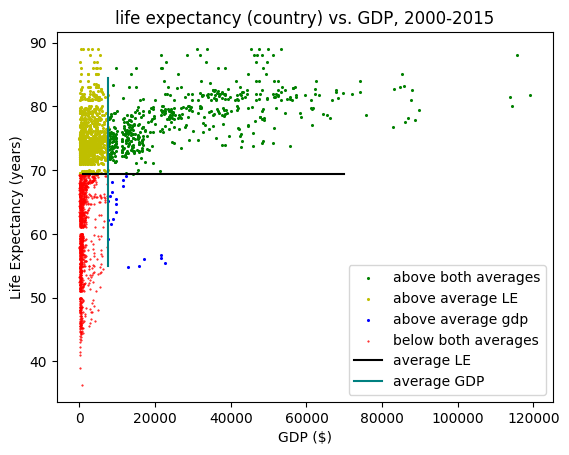

In [4]:
from plot import Plot
p = Plot()
p.plotGeneric(data=([gdps[i] for i in range(len(gdps)) if les[i] > avg_le and gdps[i] > avg_gdp],
                    [les[i] for i in range(len(gdps)) if les[i] > avg_le and gdps[i] > avg_gdp]),label='above both averages',
                    scatterArgs={'s':1.5,'color':'g'},
                    wait=True)
p._legend()
p.plotGeneric(data=([gdps[i] for i in range(len(gdps)) if les[i] > avg_le and gdps[i] <= avg_gdp],
                    [les[i] for i in range(len(gdps)) if les[i] > avg_le and gdps[i] <= avg_gdp]),label='above average LE',
                    scatterArgs={'s':1.5,'color':'y'},
                    wait=True)
p._legend()
p.plotGeneric(data=([gdps[i] for i in range(len(gdps)) if les[i] <= avg_le and gdps[i] > avg_gdp],
                    [les[i] for i in range(len(gdps)) if les[i] <= avg_le and gdps[i] > avg_gdp]),label='above average gdp',
                    scatterArgs={'s':1.5,'color':'b'},
                    wait=True)
p._legend()
p.plotGeneric(data=([gdps[i] for i in range(len(gdps)) if les[i] <= avg_le and gdps[i] <= avg_gdp],
                    [les[i] for i in range(len(gdps)) if les[i] <= avg_le and gdps[i] <= avg_gdp]),label='below both averages',
                    scatterArgs={'s':0.25,'color':'r'},
                    wait=True,
                    chart={'title':'life expectancy (country) vs. GDP, 2000-2015',
                           'xlabel':'GDP ($)',
                           'ylabel':'Life Expectancy (years)'})
plt.plot([1000,70000],[avg_le,avg_le],label='average LE',color='black')
plt.plot([avg_gdp,avg_gdp],[55,84.5],label='average GDP',color='teal')
plt.plot([])
plt.legend()
p._showPlt()

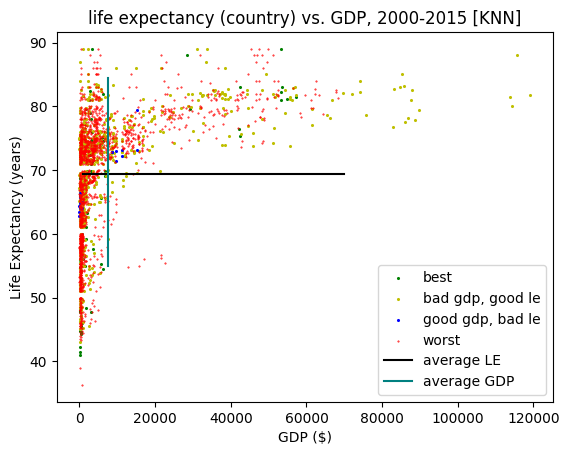

best 118
good le 742
good gdp 18
worst 1607
Test set score: 0.68


In [5]:
cat1 = [i for i in range(len(gdps)) if gdps[i] < avg_gdp and les[i] < avg_le]
cat2 = [i for i in range(len(gdps)) if gdps[i] < avg_gdp and les[i] >= avg_le]
cat3 = [i for i in range(len(gdps)) if gdps[i] >= avg_gdp and les[i] < avg_le]
cat4 = [i for i in range(len(gdps)) if gdps[i] >= avg_gdp and les[i] >= avg_le]

def _extract(idxs,arr):
       out = []
       for i in idxs:
              out.append(arr[i])
       return out

def extract(idxs,*arrs):
       out = []
       for _,a in enumerate(*arrs):
              out.append(_extract(idxs,a))
       return tuple(out)

def _extract_category(predictions,cat_num):
       return [i for i,x in enumerate(predictions) if x == cat_num]

def extract_categories(predictions):
       out = []
       for cat_num in range(1,5):
              out.append(_extract_category(predictions,cat_num))
       for i in range(len(out)):
              out[i] = extract(out[i],[gdps,les])
       return out

from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
import numpy as np
n = KNeighborsClassifier(n_neighbors=2)

categories = [1,2,3,4]
y = []
cats = [cat1,cat2,cat3,cat4]
for i,cat in enumerate(cats):
    for c in cat:
        y.append(i+1)
y = np.array(y)
X = np.array(list(zip(gdps,les)))
classifier = n.fit(X,y)
predictions = classifier.predict(X)
cats = extract_categories(predictions)
colors = ['g','y','b','r']
p.plotGeneric(data=cats[3],label='best',
                    scatterArgs={'s':1.5,'color':'g'},
                    wait=True)
p._legend()
p.plotGeneric(data=cats[1],label='bad gdp, good le',
                    scatterArgs={'s':1.5,'color':'y'},
                    wait=True)
p._legend()
p.plotGeneric(data=cats[2],label='good gdp, bad le',
                    scatterArgs={'s':1.5,'color':'b'},
                    wait=True)
p._legend()
p.plotGeneric(data=cats[0],label='worst',
                    scatterArgs={'s':0.2,'color':'r'},
                    wait=True,
                    chart={'title':'life expectancy (country) vs. GDP, 2000-2015 [KNN]',
                           'xlabel':'GDP ($)',
                           'ylabel':'Life Expectancy (years)'})
plt.plot([1000,70000],[avg_le,avg_le],label='average LE',color='black')
plt.plot([avg_gdp,avg_gdp],[55,84.5],label='average GDP',color='teal')
# plt.plot([])
plt.legend()
p._showPlt()
print('best',len(cats[3][0]))
print('good le',len(cats[1][0]))
print('good gdp',len(cats[2][0]))
print('worst',len(cats[0][0]))
print("Test set score: {:.2f}".format(np.mean(predictions == y)))


In [6]:
!pip3 install mglearn --q


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


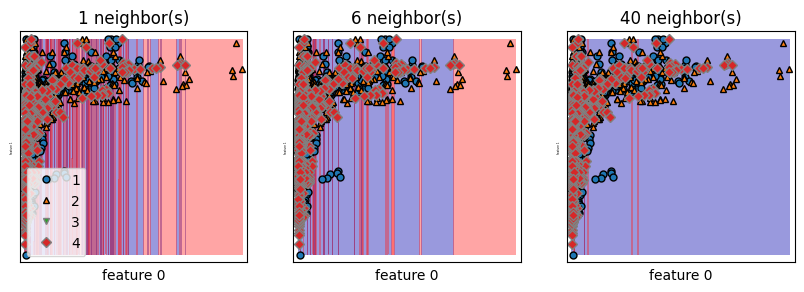

In [22]:
from matplotlib import pyplot as plt
import mglearn
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 6, 40], axes):
# the fit method returns the object self, so we can instantiate
# and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y) 
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.05, ax=ax, alpha=.4) 
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax,s=5)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0",fontsize=10)
    ax.set_ylabel("feature 1",fontsize=2)
_ = axes[0].legend(loc=3)
# Intro to ML w py. pg 36

In [8]:
X.shape

(2485, 2)

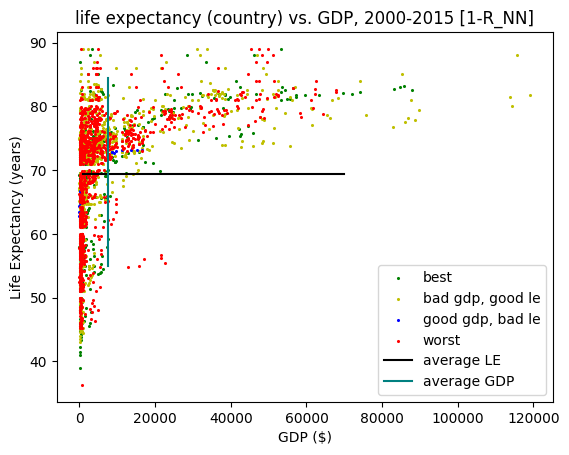

best 465
good le 912
good gdp 21
worst 1087


In [9]:
rn = RadiusNeighborsClassifier(radius=1.5)
classifier = rn.fit(X,y)
predictions = classifier.predict(X)
cats = extract_categories(predictions)
p.plotGeneric(data=cats[3],label='best',
                    scatterArgs={'s':1.5,'color':'g'},
                    wait=True)
p._legend()
p.plotGeneric(data=cats[1],label='bad gdp, good le',
                    scatterArgs={'s':1.5,'color':'y'},
                    wait=True)
p._legend()
p.plotGeneric(data=cats[2],label='good gdp, bad le',
                    scatterArgs={'s':1.5,'color':'b'},
                    wait=True)
p._legend()
p.plotGeneric(data=cats[0],label='worst',
                    scatterArgs={'s':1.5,'color':'r'},
                    wait=True,
                    chart={'title':'life expectancy (country) vs. GDP, 2000-2015 [1-R_NN]',
                           'xlabel':'GDP ($)',
                           'ylabel':'Life Expectancy (years)'})
plt.plot([1000,70000],[avg_le,avg_le],label='average LE',color='black')
plt.plot([avg_gdp,avg_gdp],[55,84.5],label='average GDP',color='teal')
plt.legend()
p._showPlt()
print('best',len(cats[3][0]))
print('good le',len(cats[1][0]))
print('good gdp',len(cats[2][0]))
print('worst',len(cats[0][0]))

In [10]:
#todo: knn, other clustering